# How do guest characteristics and booking behaviours influence revenues, and how do these patterns differ between the Resort and City Hotels?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define the functions we will use to analyze the data.

def get_lead_time(data, hotel, customer_type):
    '''
    Get lead times for a specific hotel and customer type.
    input: data, hotel, customer_type
    output: lead times for the specified hotel and customer type in the form of a pandas Series.
    '''
    return data[
        (data['hotel'] == hotel) &
        (data['customer_type'] == customer_type) &
        (data['is_canceled'] == 0)
    ]['lead_time']

def get_adr(data, hotel, customer_type):
    '''
    Get average daily rates (ADR) for a specific hotel and customer type.
    input: data, hotel, customer_type
    output: ADRs for the specified hotel and customer type in the form of a pandas Series.
    '''
    return data[
        (data['hotel'] == hotel) &
        (data['customer_type'] == customer_type) &
        (data['is_canceled'] == 0)
    ]['adr']

def get_average_adr(data, hotel, customer_type, distribution_channel):
    '''
    Get average ADR for a specific hotel, customer type, and distribution channel.'
    input: data, hotel, customer_type, distribution_channel
    output: average ADR for the specified hotel, customer type, and distribution channel.
    '''
    return data[
        (data['hotel'] == hotel) &
        (data['customer_type'] == customer_type) &
        (data['is_canceled'] == 0) &
        (data['distribution_channel'] == distribution_channel)
    ]['adr'].mean()

In [3]:
# Load the dataset and clean it. We remove rows with missing values in the columns we are interested in.
# The dataset is assumed to be in the same directory as this script, and in CSV format.

data = pd.read_csv('hotel_bookings.csv')
clean_data = data.dropna(subset=['adr', 'lead_time', 'customer_type', 'hotel', 'is_canceled', 'distribution_channel'])
clean_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119389,City Hotel,0.0,23.0,2017.0,August,35.0,30.0,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06/09/2017
119390,City Hotel,0.0,102.0,2017.0,August,35.0,31.0,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07/09/2017
119391,City Hotel,0.0,34.0,2017.0,August,35.0,31.0,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07/09/2017
119392,City Hotel,0.0,109.0,2017.0,August,35.0,31.0,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07/09/2017


In [4]:
# Now we can analyse the data. First, we create lead time variables for the different customer types and hotels.
lead_time_resort_transient, lead_time_city_transient = get_lead_time(clean_data, 'Resort Hotel', 'Transient'), get_lead_time(clean_data, 'City Hotel', 'Transient')
lead_time_resort_transient_party, lead_time_city_transient_party = get_lead_time(clean_data, 'Resort Hotel', 'Transient-Party'), get_lead_time(clean_data, 'City Hotel', 'Transient-Party')
lead_time_resort_contract, lead_time_city_contract = get_lead_time(clean_data, 'Resort Hotel', 'Contract'), get_lead_time(clean_data, 'City Hotel', 'Contract')
lead_time_resort_group, lead_time_city_group = get_lead_time(clean_data, 'Resort Hotel', 'Group'), get_lead_time(clean_data, 'City Hotel', 'Group')

# Next, we create ADR variables for the different customer types and hotels.
adr_resort_transient, adr_city_transient = get_adr(clean_data, 'Resort Hotel', 'Transient'), get_adr(clean_data, 'City Hotel', 'Transient')
adr_resort_transient_party, adr_city_transient_party = get_adr(clean_data, 'Resort Hotel', 'Transient-Party'), get_adr(clean_data, 'City Hotel', 'Transient-Party')
adr_resort_contract, adr_city_contract = get_adr(clean_data, 'Resort Hotel', 'Contract'), get_adr(clean_data, 'City Hotel', 'Contract')
adr_resort_group, adr_city_group = get_adr(clean_data, 'Resort Hotel', 'Group'), get_adr(clean_data, 'City Hotel', 'Group')

# Then we create a list of unique distribution channels and customer types, using them to calculate average ADR for each combination of hotel, customer type, and distribution channel.
distribution_channels = clean_data[clean_data['distribution_channel'] != 'Undefined']['distribution_channel'].replace('travel agent', 'Travel Agent').unique()
customer_types = clean_data['customer_type'].unique()
average_adr_resort = [get_average_adr(clean_data, 'Resort Hotel', customer_type, distribution_channel) for customer_type in customer_types for distribution_channel in distribution_channels]
average_adr_city = [get_average_adr(clean_data, 'City Hotel', customer_type, distribution_channel) for customer_type in customer_types for distribution_channel in distribution_channels]

In [5]:
# We print each list to determine the number of unique values.
print(distribution_channels)
print(customer_types)

# We create variables "r" and "width" that we will use to format the bar plots.
r = range(len(distribution_channels))
width = 0.1

['Direct' 'Corporate' 'Travel Agent' 'Global Distribution']
['Transient' 'Contract' 'Transient-Party' 'Group']


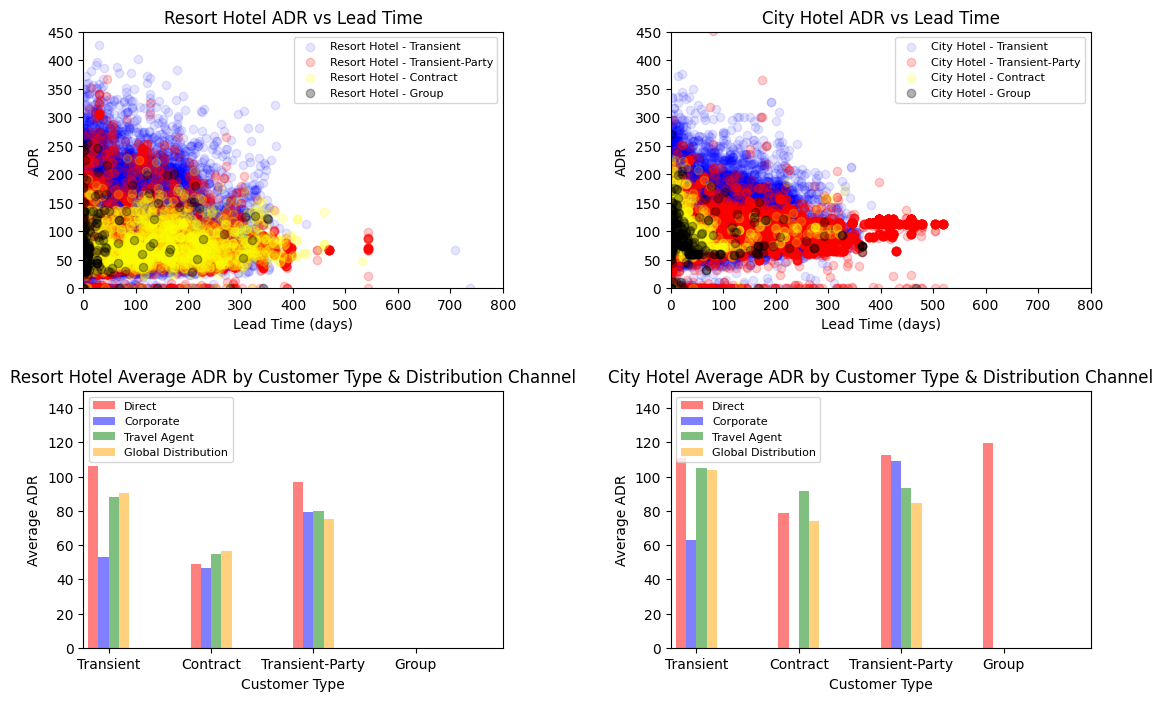

In [6]:
# Finally, we create the plots.

# We use subplots to create a 2x2 grid of plots.
fig, ax = plt.subplots(2, 2, figsize=(13, 8))

# The first plot is a scatter plot of ADR vs Lead Time for the Resort Hotel.
ax[0, 0].scatter(lead_time_resort_transient, adr_resort_transient, color='blue', label='Resort Hotel - Transient', alpha=0.1)
ax[0, 0].scatter(lead_time_resort_transient_party, adr_resort_transient_party, color='red', label='Resort Hotel - Transient-Party', alpha=0.2)
ax[0, 0].scatter(lead_time_resort_contract, adr_resort_contract, color='yellow', label='Resort Hotel - Contract', alpha=0.2)
ax[0, 0].scatter(lead_time_resort_group, adr_resort_group, color='black', label='Resort Hotel - Group', alpha=0.3)
ax[0, 0].set(xlabel='Lead Time (days)', ylabel='ADR', title='Resort Hotel ADR vs Lead Time', xlim=(0, 800), ylim=(0, 450))
ax[0, 0].legend(fontsize=8)

# The second plot is a scatter plot of ADR vs Lead Time for the City Hotel.
ax[0, 1].scatter(lead_time_city_transient, adr_city_transient, color='blue', label='City Hotel - Transient', alpha=0.1)
ax[0, 1].scatter(lead_time_city_transient_party, adr_city_transient_party, color='red', label='City Hotel - Transient-Party', alpha=0.2)
ax[0, 1].scatter(lead_time_city_contract, adr_city_contract, color='yellow', label='City Hotel - Contract', alpha=0.2)
ax[0, 1].scatter(lead_time_city_group, adr_city_group, color='black', label='City Hotel - Group', alpha=0.3)
ax[0, 1].set(xlabel='Lead Time (days)', ylabel='ADR', title='City Hotel ADR vs Lead Time', xlim=(0, 800), ylim=(0, 450))
ax[0, 1].legend(fontsize=8)

# The third plot is a bar plot of average ADR for the Resort Hotel by customer type and distribution channel.
ax[1, 0].bar(r, average_adr_resort[:4], width, color='red', alpha=0.5, label=f'{distribution_channels[0]}')
ax[1, 0].bar([x + width for x in r], average_adr_resort[4:8], width, color='blue', alpha=0.5, label=f'{distribution_channels[1]}')
ax[1, 0].bar([x + 2 * width for x in r], average_adr_resort[8:12], width, color='green', alpha=0.5, label=f'{distribution_channels[2]}')
ax[1, 0].bar([x + 3 * width for x in r], average_adr_resort[12:16], width, color='orange', alpha=0.5, label=f'{distribution_channels[3]}')
ax[1, 0].set(xlabel='Customer Type', ylabel='Average ADR', title='Resort Hotel Average ADR by Customer Type & Distribution Channel', xticks=[r + 1.5 * width for r in range(len(customer_types))], xticklabels=customer_types, xlim=(-width, len(customer_types)), ylim=(0, 150))
ax[1, 0].legend(fontsize=8)

# The fourth plot is a bar plot of average ADR for the City Hotel by customer type and distribution channel.
ax[1, 1].bar(r, average_adr_city[:4], width, color='red', alpha=0.5, label=f'{distribution_channels[0]}')
ax[1, 1].bar([x + width for x in r], average_adr_city[4:8], width, color='blue', alpha=0.5, label=f'{distribution_channels[1]}')
ax[1, 1].bar([x + 2 * width for x in r], average_adr_city[8:12], width, color='green', alpha=0.5, label=f'{distribution_channels[2]}')
ax[1, 1].bar([x + 3 * width for x in r], average_adr_city[12:16], width, color='orange', alpha=0.5, label=f'{distribution_channels[3]}')
ax[1, 1].set(xlabel='Customer Type', ylabel='Average ADR', title='City Hotel Average ADR by Customer Type & Distribution Channel', xticks=[r + 1.5 * width for r in range(len(customer_types))], xticklabels=customer_types, xlim=(-width, len(customer_types)), ylim=(0, 150))
ax[1, 1].legend(fontsize=8)

# Adjust the layout of the plots to prevent overlap and show the plots.
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

np.float64(83.48857885615251)

## Mini Report

The business question we asked was "How do guest characteristics and booking behaviours influence revenues, and how do these patterns differ between the Resort and City Hotels?".

Understanding the customer profiles that drive the most revenue is critical for any business, especially "high-touch" businesses such as hotels, where the customer journey requires a large amount of resources and planning to facilitate. Exploring how these profiles differ between similar businesses in different environments - such as "City" and "Resort" hotels - can help us identify the strengths and weaknesses of different approaches to the same business model.

The average daily rate is a key metric for assessing a hotel's revenue generation, customer types and distribution channels allow us to segment customer profiles into useful characteristic and behavioural categories, lead times allow us to assess the efficiency of the sales process and how that affects revenues.

**Findings & Insights:** Both Resort and City Hotels earn most revenue from Direct, Travel Agent, and Global Distribution Transient bookings, especially with short lead times. The shorter the lead times, the higher the ADR, as seen clearly in the downward slopes of the first-row graphs as lead time increases. This pattern is especially visible for City Hotels. Group bookings yield lowest ADR in both. Thus, distribution channels, customer types, and lead times critically impact revenues across hotel types.

Overall mark: 64

#### Business Question:
The business question is clearly identified and is well-connected to the given dataset. The significance of answering the question is also explained. Comprehensive evidences are exhibited to derive findings and implications, though actionable suggestions are not provided explicitly. Overall the analysis is effective and insightful to answer the question.

<u>Very Good</u>

#### Data:
A list of key variables are employed, including 'adr', 'lead_time', 'customer_type', 'hotel', 'is_canceled', 'distribution_channel', which are effective for answering the proposed question. The rationale of choosing them is clearly explained. Basic variable transormation is used to create new variables, e.g. average ADR. Improvements could include applying some data preprocessing techniques, such as data filtering, to remove any biased observations.

<u>Good</u>

#### Visualization:
Multiple plots are employed for the visualization purpose, which includes scatter plots and the bar charts. All plots come with the essential elements of titles, axis labels and ticks. Necessary legends are also displayed for better readability. However, the information in the scatter plots is not quite straightforward. It is recommented to separate the scatter for different groups into different plot, which can be clearer. For the bar charts, the 'Gruop' category needs to be revised, it seems that the result is biased by NaN observations.

<u>Good</u>

#### Code:
The code struture is clear and easy to follow overall. There are no obvious erros. Wrapping some code in functions reflects good coding technique. In addition, the use of list comprehension instead of for loop shows good awareness of code efficiency. Comments are available along with the code, which makes the script more understandable.

<u>Very Good</u>
